# Logistic regresion

In [1]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For reproducibility
np.random.seed(1234)

## Implementation

### Linear combination and sigmoid

In [2]:
def linear_combination(X:np.ndarray, w:np.ndarray) -> np.ndarray:
    '''Calculates linear combination of features.
    
    The linear combination is calculated witht he following vectorised form

    z = Xw

    Args:
        X: feature matrix with shape(n, m)
        w: weight vector with shape(m,)

    Returns:
        Linear combination of features with shape (n,)
    '''

    return X @ w

def sigmoid(z: np.ndarray) -> np.ndarray:
    '''Calculates sigmoid of linear combination of features z
    
    Args:
        z: list of floats

    Returns:
        Sigmoid function of linear combination of features as an array
    '''

    return 1/(1 + np.exp(-z))



### Inference

In [3]:
def predict(X: np.ndarray, w:np.ndarray, threshold:float) -> np.ndarray:
    '''Predicts class label for samples
    
    Args:
        X: feature matrix with shape(n, m)
        w: weight vector with shape(m,)
        threshold: Probability the=reshold for prediction
    
    Returns:
        Predicted class labels
    '''
    return np.where(sigmoid(linear_combination(X, w)) > threshold, 1, 0)

### Loss function

In [4]:
def loss(X:np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate:float) -> float:
    '''Calculate loss function for a given weight vactor

    Args:
        X: feature matrix with shape(n, m)
        y: label vector with shape(n,)
        w: weight vector with shape(m,)
        reg_rate: L2 regularisation rate

    Returns:
        Loss function
    '''
    return ((-1*np.sum(y @ np.log(linear_combination(X, w)) + (1 - y) @ np.log(1 - linear_combination(X, w)))) 
        + reg_rate * np.dot(w.T, w))

### Gradient of loss function

In [5]:
def calculate_gradient(X:np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate: float) -> np.ndarray:
    '''Calculates gradients of loss function wrt weight vector on training set

    Args: 
        X: Feature matrix for training data.
        y:Label vector for training data.
        reg_rate: regularisation rate

    returns:
        A vector of gradients
    '''

    return X.T @ (sigmoid(linear_combination(X, w)) - y) + reg_rate*w

### Gradient Descent

In [6]:
def update_weights(w:np.ndarray, grad:np.ndarray, lr:float) -> np.ndarray:
    '''Updates the weights based on the gradient of loss function
    Args:
        1. w: Weight vector
        2. grad: gradient of loss w.r.t w
        3.  lr: learning rate
    Returns:
        Updated weights
    '''
    return (w - lr*grad)

def gd(X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate:float) -> np.ndarray:
    '''Estimates the parameters of logistic regression model with gradient descent'
    
    Args:
        X: Feaature matrix for training data.
        y: Label vector for traaining data.
        num_epochs: NUmber of training steps
        lr: Learning rate
        reg_rate: Regularisation rate

    Returns:
        Weight vector: Final weight vector
    '''

    w = np.zeros(X.shape[1])
    w_all = []
    err_all = []

    for i in np.arange(0, num_epochs):
        dJdW = calculate_gradient(X, y, w, reg_rate)
        w_all.append(w)
        err_all.append(err_all)
        w = update_weights(w, dJdW, lr)

    return w

## Putting it all together

In [7]:
class LogisticRegression(object):

    '''Logistic Regression model

        y = sigmoid(X @ w)
    '''
    
    def set_weight_vector(self, w):
        self.w = w
    
    def linear_combination(self, X:np.ndarray) -> np.ndarray:
        '''Calculates linear combination of features.
    
        The linear combination is calculated witht he following vectorised form

        z = Xw
        Args:
            X: feature matrix with shape(n, m)
            w: weight vector with shape(m,)

        Returns:
            Linear combination of features with shape (n,)
        
        '''
        return X @ self.w

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        '''Calculates sigmoid of linear combination of features z
    
         Args:
            z: list of floats

            Returns:
                 Sigmoid function of linear combination of features as an array
        '''

        return 1/(1 + np.exp(-z))
    
    def activation(self, X:np.ndarray) -> np.ndarray:
        '''Calculates sigmoid activation for logistic regression.
        
        Args:
            X: Feature matrix with shape (n, m)

        Returns:
            activation vector with shape (n,)
        '''
        
        return self.sigmoid(self.linear_combination(X))

    def predict(self, X: np.ndarray, threshold=0.5) -> np.ndarray:
        '''Predicts class label for samples

        Args:
            X: feature matrix with shape(n, m)
            w: weight vector with shape(m,)
            threshold: Probability the=reshold for prediction
    
        Returns:
            Predicted class labels
        '''
        return np.where(self.activation(X) > threshold, 1, 0).astype(int)

    def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float) -> float:
        '''Calculate loss function for a given weight vactor

        Args:
            X: feature matrix with shape(n, m)
            y: label vector with shape(n,)
            w: weight vector with shape(m,)
            reg_rate: L2 regularisation rate

        Returns:
            Loss function
        '''
        predicted_prob = self.activation(X)
        return (-1 * (np.sum(y @ np.log(predicted_prob)) + (1 - y) @ np.log(1 - predicted_prob)))  + reg_rate * np.dot(self.w.T, self.w)

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate: float) -> np.ndarray:
        '''Calculates gradients of loss function wrt weight vector on training set

        Args: 
            X: Feature matrix for training data.
            y:Label vector for training data.
            reg_rate: regularisation rate

        Returns:
            A vector of gradients
        '''

        return X.T @ (self.activation(X) - y) + reg_rate * self.w

    def update_weights(self, grad:np.ndarray, lr:float) -> np.ndarray:
        '''Updates the weights based on the gradient of loss function
        Args:
            1. w: Weight vector
            2. grad: gradient of loss w.r.t w
            3.  lr: learning rate
        Returns:
            Updated weights
        '''
        return (self.w - lr*grad)

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate:float) -> np.ndarray:
        '''Estimates the parameters of logistic regression model with gradient descent'
    
        Args:
            X: Feaature matrix for training data.
            y: Label vector for traaining data.
            num_epochs: NUmber of training steps
            lr: Learning rate
            reg_rate: Regularisation rate

        Returns:
            Weight vector: Final weight vector
        '''

        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []

        for i in np.arange(0, num_epochs):
            
            dJdW = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdW, lr)

        return self.w 

    
    

In [8]:
#Polynomial Transformations

import itertools
import functools

def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    #reduce(lambda x, y: x * y, items, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x * y, items)

def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix.
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.transpose() #transposes the feature matrix
    features = [np.ones(len(x))] # populates 1s as the first features

    if logging:
        print ("Input:", x)
    
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print (items, ":", compute_new_features(items))

    if logging:
        print(np.asarray(features).transpose())

    return np.asarray(features).transpose()

## Demo #1: Logistic regression for linearly seperable binary classification

In [9]:
def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)


In [10]:
feature_matrix, label_vector = create_toy_data()
print("Shape of feature matrix:", feature_matrix.shape)
print("Shape of label vector:", label_vector.shape)

Shape of feature matrix: (50, 2)
Shape of label vector: (50,)


In [11]:
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias, label_vector, random_state=1)

In [13]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

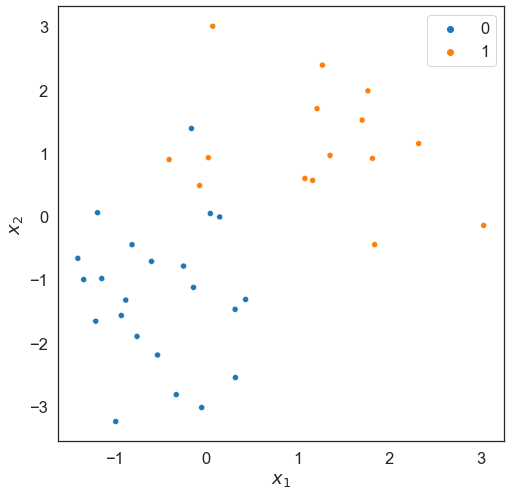

In [14]:
#Visualisation

sns.set_style("white")
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2], y = x_train[:,-1], hue = y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Model

In [15]:
log_reg = LogisticRegression()
log_reg.gd(x_train, y_train, num_epochs=1000, lr =1e-2, reg_rate=0)

array([-1.2732213 ,  2.88002755,  2.43099754])

### Learning curves

In [16]:
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)), err, 'r-')
    plt.xlabel('Iter #')
    plt.ylabel('$\mathbf{J(w)}$')

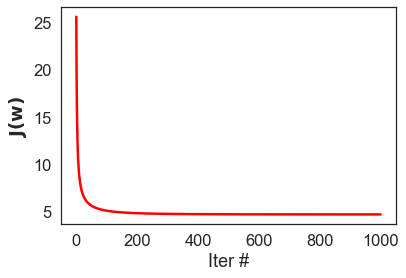

In [17]:
plot_learning_curve(log_reg.err_all)

### Model visualisation

In [18]:

def visualize_model(X_train, labels, lsc_obj, degree=1):
    
    f = plt.figure(figsize=(8, 8))

    #compute xlim and ylim
    x1_min = np.min(x_train[:, 1])
    x1_max = np.max(x_train[:, 1])
    x2_min = np.min(x_train[:, 2])
    x2_max = np.max(x_train[:, 2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc_obj.predict(x_test_poly)

    sns.scatterplot(data=X_train, x=X_train[:,1], y=X_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), alpha = 0.5,
                levels = np.linspace(0,1,3))
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

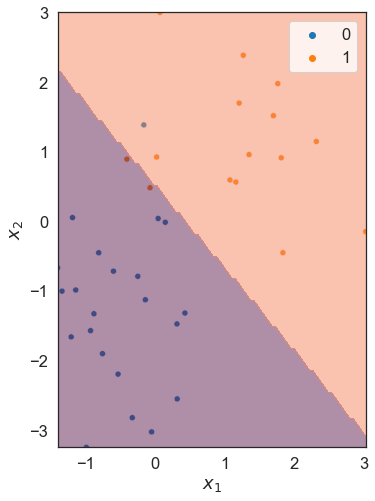

In [19]:
visualize_model(x_train, y_train, log_reg)

### Model Evaluation

In [20]:
y_test_hat = log_reg.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.80      0.89        10

    accuracy                           0.85        13
   macro avg       0.80      0.90      0.82        13
weighted avg       0.91      0.85      0.86        13



## Demo #2: Non linearly seperable case 

In [22]:
from sklearn.datasets import make_circles
feature_matrix, label_vector = make_circles()

In [23]:
assert feature_matrix.shape[0] == label_vector.shape[0]

In [24]:
x_poly = polynomial_transform(feature_matrix, degree=2)

In [25]:
print("# features before transformation: ", feature_matrix.shape)
print("# features before transformation: ", x_poly.shape)

# features before transformation:  (100, 2)
# features before transformation:  (100, 6)


In [26]:
x_train, x_test, y_train,  y_test = train_test_split(x_poly, label_vector)

In [27]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

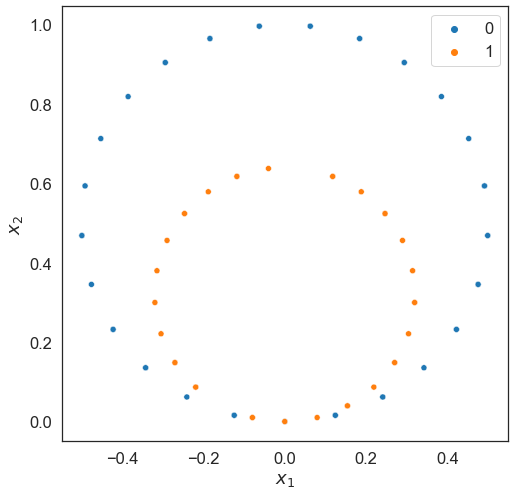

In [28]:
#Visualisation

sns.set_style("white")
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2], y = x_train[:,-1], hue = y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [29]:
log_reg_poly = LogisticRegression()
log_reg_poly.gd(x_train, y_train, num_epochs=10000, lr =1e-2, reg_rate=0)

array([ 2.01311274e+01,  1.42483781e-01,  3.32087000e-02, -2.47275646e+01,
       -1.41405455e-02, -2.48258516e+01])

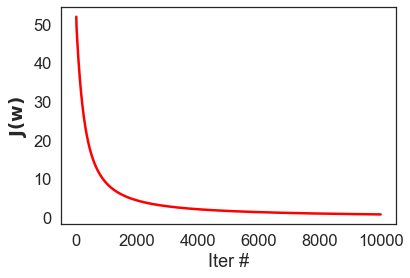

In [30]:
plot_learning_curve(log_reg_poly.err_all)

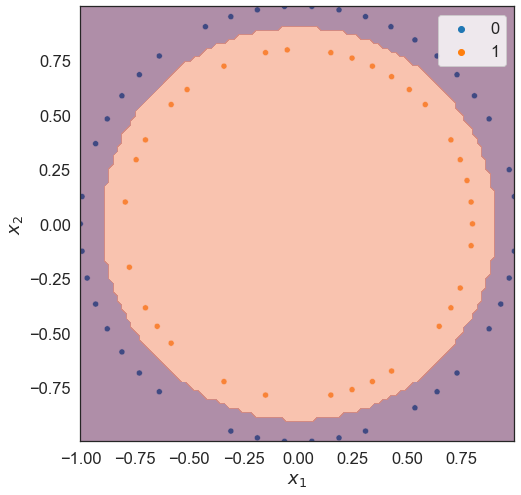

In [31]:
visualize_model(x_train, y_train, log_reg_poly, degree=2)

### Model Evaluation

In [32]:
from sklearn.metrics import classification_report

y_test_hat = log_reg_poly.predict(x_test)
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

